# I.Import Packadges

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# II. Data Set

In [5]:
cars = pd.read_csv('/Users/nadaaziz/Downloads/Car-Sales-Data.csv')

In [6]:
cars.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# III. Wrangling

In [7]:
cars.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### 1. Remove Registration & Model Columns

In [8]:
cars1 = cars.drop(['Registration', 'Model'], axis = 1)

In [9]:
cars1

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,2014


### 2. Remove Rows with Missing Data

In [10]:
cars2 = cars1.dropna(axis = 0)

In [11]:
cars2

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011
...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,1985


### 3. Detect and Remove Outliers: Price, Mileage, EngineV and Year

##### 1. Price:

In [12]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Price', ylabel='Density'>

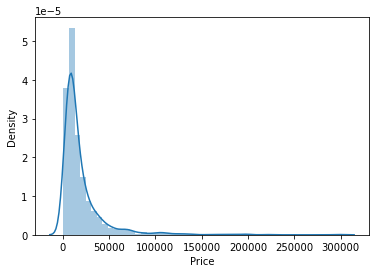

In [13]:
sns.distplot(cars2['Price'])

<AxesSubplot:xlabel='Price'>

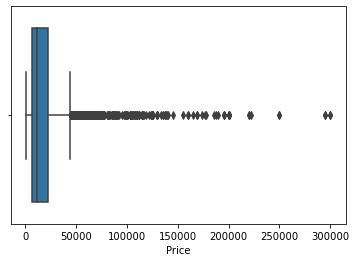

In [14]:
sns.boxplot(cars2['Price'])

In [15]:
upper_limit_P = cars2['Price'].quantile(0.99)
upper_limit_P

129812.51999999981

In [16]:
lower_limit_P = cars2['Price'].quantile(0.01)
lower_limit_P

1600.0

In [17]:
cars2 = cars2[(cars2['Price'] <= upper_limit_P) & (cars2['Price'] >= lower_limit_P)]

In [18]:
cars2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,864,NaN,1511,NaN,NaN,1840,NaN
mean,NaN,18004.596504,NaN,164.697262,2.752860,NaN,2006.443458
std,NaN,18998.863669,NaN,102.744093,4.980197,NaN,6.510558
min,NaN,1600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,2007.000000
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,2011.000000


##### 2. Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

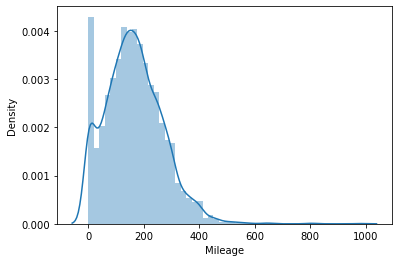

In [19]:
sns.distplot(cars2['Mileage'])

<AxesSubplot:xlabel='Mileage'>

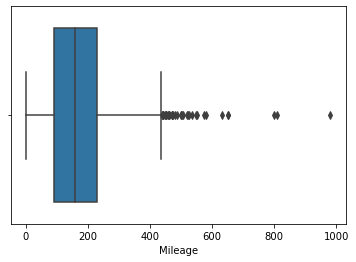

In [20]:
sns.boxplot(cars2['Mileage'])

In [21]:
upper_limit_m = cars2['Mileage'].quantile(0.99)
upper_limit_m

436.7100000000005

In [22]:
lower_limit_m = cars2['Mileage'].quantile(0.01)
lower_limit_m

0.0

In [23]:
cars2 = cars2[(cars2['Mileage'] <= upper_limit_m) & (cars2['Mileage'] >= lower_limit_m)]

In [24]:
cars2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3904,3904.000000,3904,3904.000000,3904.000000,3904,3904.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,851,NaN,1494,NaN,NaN,1812,NaN
mean,NaN,18104.067267,NaN,161.023309,2.756834,NaN,2006.543033
std,NaN,19030.447708,NaN,95.914826,5.004915,NaN,6.427003
min,NaN,1600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,7150.000000,NaN,91.750000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21500.000000,NaN,227.000000,3.000000,NaN,2012.000000


##### 3.Engine V

##### Drop all values below 0.6 and above 6.5

In [25]:
cars2 = cars2[(cars2.EngineV > 0.6) & (cars.EngineV < 6.5)]

In [26]:
cars2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3880,3880.000000,3880,3880.000000,3880.000000,3880,3880.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,846,NaN,1482,NaN,NaN,1805,NaN
mean,NaN,18163.879539,NaN,160.828093,2.450116,NaN,2006.561856
std,NaN,19064.893282,NaN,95.963265,0.948192,NaN,6.425434
min,NaN,1600.000000,NaN,0.000000,0.650000,NaN,1969.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11600.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21600.000000,NaN,226.000000,3.000000,NaN,2012.000000


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

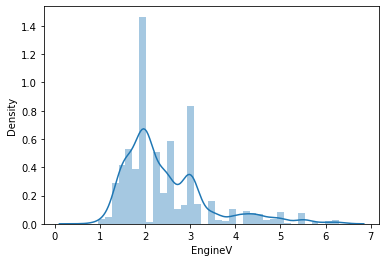

In [27]:
sns.distplot(cars2.EngineV)

<AxesSubplot:xlabel='EngineV'>

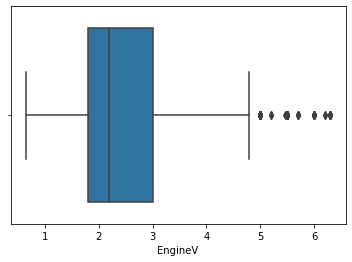

In [28]:
sns.boxplot(cars2.EngineV)

In [29]:
upper_limit_e = cars2['EngineV'].quantile(0.99)
upper_limit_e

5.5

In [30]:
lower_limit_e = cars2['EngineV'].quantile(0.01)
lower_limit_e

1.2

In [31]:
cars2 = cars2[(cars2['EngineV'] <= upper_limit_e) & (cars2['EngineV'] >= lower_limit_e)]

In [32]:
cars2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3826,3826.000000,3826,3826.000000,3826.000000,3826,3826.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,841,NaN,1466,NaN,NaN,1800,NaN
mean,NaN,18013.844174,NaN,161.599582,2.425536,NaN,2006.542603
std,NaN,18976.404930,NaN,96.045388,0.884936,NaN,6.435188
min,NaN,1600.000000,NaN,0.000000,1.200000,NaN,1969.000000
25%,NaN,7199.250000,NaN,92.000000,1.800000,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,2008.000000
75%,NaN,21326.250000,NaN,229.000000,3.000000,NaN,2012.000000


##### 4.Year

<AxesSubplot:xlabel='Year', ylabel='Density'>

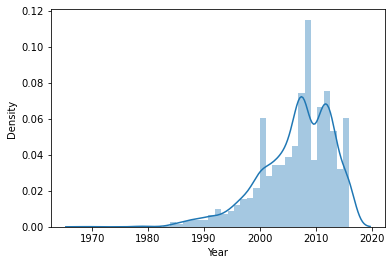

In [33]:
sns.distplot(cars2.Year)

<AxesSubplot:xlabel='Year'>

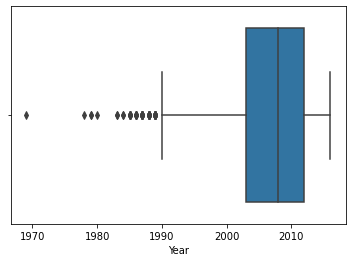

In [34]:
sns.boxplot(cars2.Year)

In [35]:
upper_limit_y = cars2['Year'].quantile(0.99)
upper_limit_y

2016.0

In [36]:
lower_limit_y = cars2['Year'].quantile(0.01)
lower_limit_y

1987.0

In [37]:
cars2 = cars2[(cars2['Year'] <= upper_limit_y) & (cars2['Year'] >= lower_limit_y)]

In [38]:
cars2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3799,3799.000000,3799,3799.000000,3799.000000,3799,3799.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,836,NaN,1448,NaN,NaN,1792,NaN
mean,NaN,18110.292527,NaN,161.187418,2.427560,NaN,2006.705712
std,NaN,19001.847921,NaN,95.795102,0.886724,NaN,6.151308
min,NaN,1600.000000,NaN,0.000000,1.200000,NaN,1987.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,158.000000,2.200000,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,2012.000000


### Multicollinearity

In [39]:
cars2.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.554466,0.381024,0.569548
Mileage,-0.554466,1.000000,0.020944,-0.717477
EngineV,0.381024,0.020944,1.000000,-0.029689
Year,0.569548,-0.717477,-0.029689,1.000000


##### drop Year

In [40]:
cars2.drop(['Year'], axis = 1)

,Brand,Price,Body,Mileage,EngineV,Engine Type
0,BMW,4200.0,sedan,277,2.0,Petrol
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas
3,Audi,23000.0,crossover,240,4.2,Petrol
4,Toyota,18300.0,crossover,120,2.0,Petrol
...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel
4339,Toyota,17900.0,sedan,35,1.6,Petrol
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel
4341,BMW,6500.0,sedan,1,3.5,Petrol


### Linearity and Normality

##### 1.Price:

<AxesSubplot:xlabel='Price', ylabel='Density'>

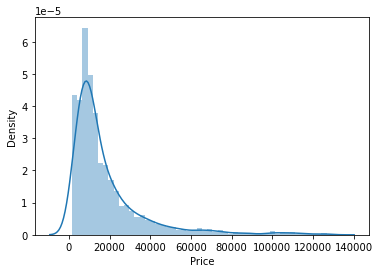

In [41]:
sns.distplot(cars2['Price'])

In [42]:
cars2['P2'] = boxcox(cars2['Price'],0)

<AxesSubplot:xlabel='P2', ylabel='Density'>

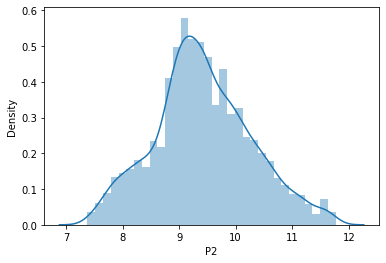

In [43]:
sns.distplot(cars2['P2'])

##### 2. Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

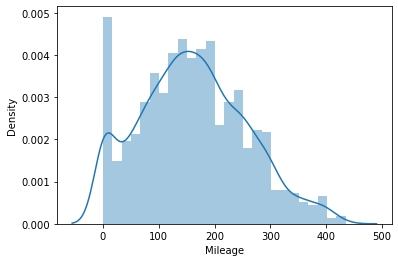

In [44]:
sns.distplot(cars2['Mileage'])

##### 3. EngineV:

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

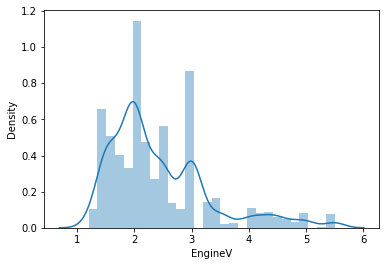

In [45]:
sns.distplot(cars2['EngineV'])

In [46]:
cars2['EngV'] = boxcox(cars2['EngineV'],0)

<AxesSubplot:xlabel='EngV', ylabel='Density'>

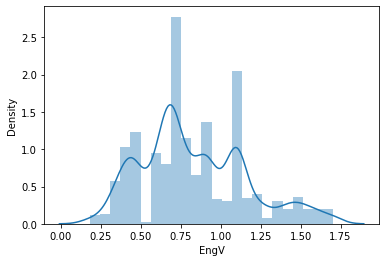

In [47]:
sns.distplot(cars2['EngV'])

In [48]:
cars3 = cars2[['Brand','P2', 'Mileage', 'EngV', 'Body','Engine Type']]

In [49]:
cars3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3799 entries, 0 to 4344
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        3799 non-null   object 
 1   P2           3799 non-null   float64
 2   Mileage      3799 non-null   int64  
 3   EngV         3799 non-null   float64
 4   Body         3799 non-null   object 
 5   Engine Type  3799 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 207.8+ KB


### Convert Price and EngV into integers

In [50]:
cars3['P2'] = cars3['P2'].astype(int)
cars3['EngV'] = cars3['EngV'].astype(int)

### Dummy Code the categorical variables

In [51]:
BrandR = pd.get_dummies(cars3['Brand'])
BodyR = pd.get_dummies(cars3['Body'])
EngTypeR = pd.get_dummies(cars3['Engine Type'])

In [52]:
cars4 = pd.concat([cars3, BrandR, BodyR, EngTypeR], axis = 1)

In [53]:
cars4

,Brand,P2,Mileage,EngV,Body,Engine Type,Audi,BMW,Mercedes-Benz,Mitsubishi,...,crossover,hatch,other,sedan,vagon,van,Diesel,Gas,Other,Petrol
0,BMW,8,277,0,sedan,Petrol,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,Mercedes-Benz,8,427,1,van,Diesel,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,Mercedes-Benz,9,358,1,sedan,Gas,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,Audi,10,240,1,crossover,Petrol,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Toyota,9,120,0,crossover,Petrol,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,9,163,0,van,Diesel,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4339,Toyota,9,35,0,sedan,Petrol,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4340,Mercedes-Benz,11,9,1,sedan,Diesel,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4341,BMW,8,1,1,sedan,Petrol,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [54]:
df = cars4.drop(['Brand', 'Body', 'Engine Type'], axis = 1)

In [55]:
df.columns

Index(['P2', 'Mileage', 'EngV', 'Audi', 'BMW', 'Mercedes-Benz', 'Mitsubishi',
       'Renault', 'Toyota', 'Volkswagen', 'crossover', 'hatch', 'other',
       'sedan', 'vagon', 'van', 'Diesel', 'Gas', 'Other', 'Petrol'],
      dtype='object')

In [56]:
df.head()

,P2,Mileage,EngV,Audi,BMW,Mercedes-Benz,Mitsubishi,Renault,Toyota,Volkswagen,crossover,hatch,other,sedan,vagon,van,Diesel,Gas,Other,Petrol
0,8,277,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,8,427,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,9,358,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,10,240,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,9,120,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


### Create a Basic Model

In [53]:
x = df.drop(['P2'], axis=1)
y = df['P2']

### Scale the Data

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [55]:
inputs_scaled = scaler.transform(x)

In [56]:
x_train, x_test, y_train, y_test = train_test_split (inputs_scaled, y, test_size = 0.2, random_state=365)

In [57]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [58]:
y_hat = reg.predict(x_train)

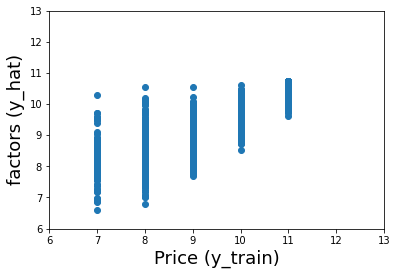

In [59]:
plt.scatter(y_train, y_hat)
plt.xlabel('Price (y_train)', size=18)
plt.ylabel('factors (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

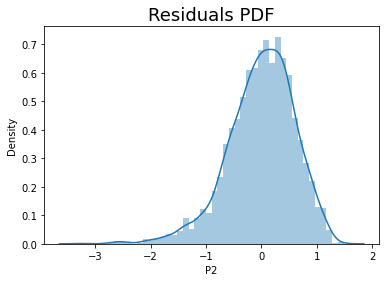

In [60]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size = 18)

In [61]:
reg.score(x_train, y_train)

0.5726634422978878

In [62]:
reg.intercept_ ## this is the bias


8.926014446121723

In [63]:
reg.coef_ ## this is the weights


array([-5.19418863e-01,  1.86111705e-01, -3.76113858e+11, -4.50377840e+11,
       -4.80921250e+11, -3.28175020e+11, -3.83360451e+11, -4.05991303e+11,
       -5.04899417e+11,  5.62213474e+11,  3.37146571e+11,  4.04148103e+11,
        6.74381103e+11,  4.10704126e+11,  5.07748557e+11,  8.33836380e+12,
        5.92595028e+12,  2.66107190e+12,  7.99065134e+12])

In [64]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-5.194189e-01
1,EngV,1.861117e-01
2,Audi,-3.761139e+11
3,BMW,-4.503778e+11
4,Mercedes-Benz,-4.809212e+11
5,Mitsubishi,-3.281750e+11
6,Renault,-3.833605e+11
7,Toyota,-4.059913e+11
8,Volkswagen,-5.048994e+11
9,crossover,5.622135e+11
